In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer  # Corrected import statement
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df = pd.read_csv('/Users/tejaswinitippanaboina/Desktop/Anime project/anime 2 data.csv')

In [3]:
categorical_features = ['mediaType', 'sznOfRelease']  # Make sure these are the correct column names

In [4]:
numeric_features = ['eps', 'duration', 'ongoing', 'startYr', 'finishYr', 'watched', 'watching', 'wantWatch', 'dropped', 'votes']

In [5]:
df['ongoing'] = df['ongoing'].apply(lambda x: 1 if x == 'TRUE' else 0)

In [6]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

In [7]:
categorical_transformer = OneHotEncoder()

In [8]:
# Set up the ColumnTransformer to apply transformers to the respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
# Remove rows with NaN in the target variable 'rating'
df_cleaned = df.dropna(subset=['rating'])

# Now define your features and target variable again using the cleaned DataFrame
X = df_cleaned.drop(['ID', 'title', 'description', 'studios', 'tags', 'contentWarn', 'rating'], axis=1)
y = df_cleaned['rating']



In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create a modeling pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('linear_regression', LinearRegression())
])

In [12]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['eps', 'duration', 'ongoing',
                                                   'startYr', 'finishYr',
                                                   'watched', 'watching',
                                                   'wantWatch', 'dropped',
                                                   'votes']),
                                                 ('cat', OneHotEncoder(),
                                                  ['mediaType',
                                                   'sznOfRelease'])])),
                ('linear_regression', LinearRegression())])

In [13]:
y_pred = pipeline.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.6259467677626682


In [15]:
y_pred = pipeline.predict(X_test)

In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.6259467677626682


In [17]:
media_type_counts = df['mediaType'].value_counts()
season_release_counts = df['sznOfRelease'].value_counts()

In [18]:
# Display the counts for categorical data
print(media_type_counts)
print(season_release_counts)

TV             4510
Movie          2512
OVA            2097
Music Video    1596
Web            1555
DVD Special     849
Other           782
TV Special      609
Name: mediaType, dtype: int64
Spring    1202
Fall      1071
Winter     765
Summer     729
Name: sznOfRelease, dtype: int64


In [19]:
# If you need to calculate specific statistics like median or mode:
median_ratings = df['rating'].median()
mode_media_type = df['mediaType'].mode()

In [20]:
# Display specific statistics
print(f"Median Rating: {median_ratings}")
print(f"Most Common MediaType: {mode_media_type[0]}")  # mode() returns a Series, so we take the first element

Median Rating: 2.965
Most Common MediaType: TV


In [21]:
sns.set_style('whitegrid')

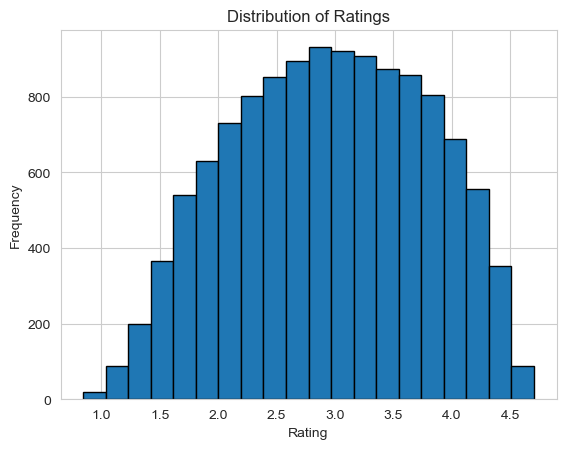

In [22]:
# Histograms
df['rating'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

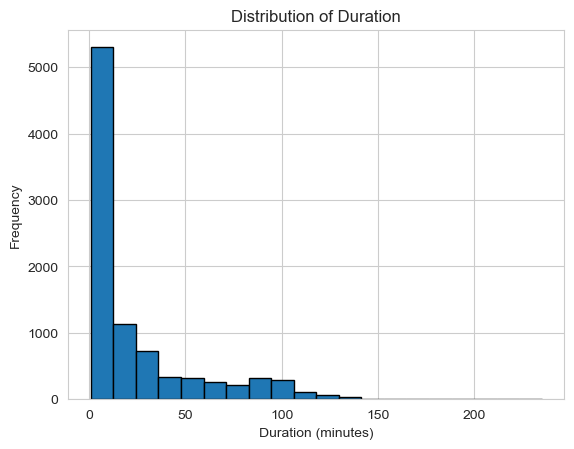

In [23]:
df['duration'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


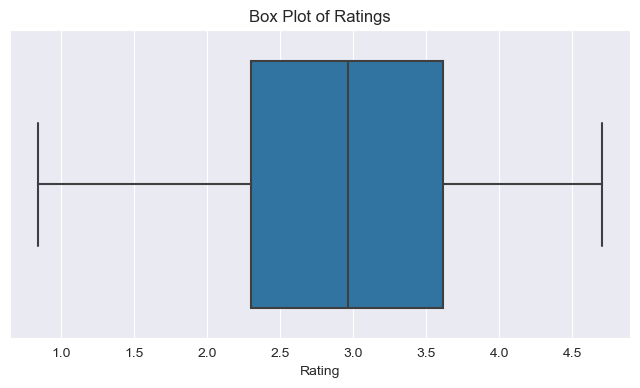

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['rating'])
plt.title('Box Plot of Ratings')
plt.xlabel('Rating')
plt.show()

/var/folders/16/6xtmvp993b13h331qwstgg800000gn/T/ipykernel_8451/86440797.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['rating'], shade=True)


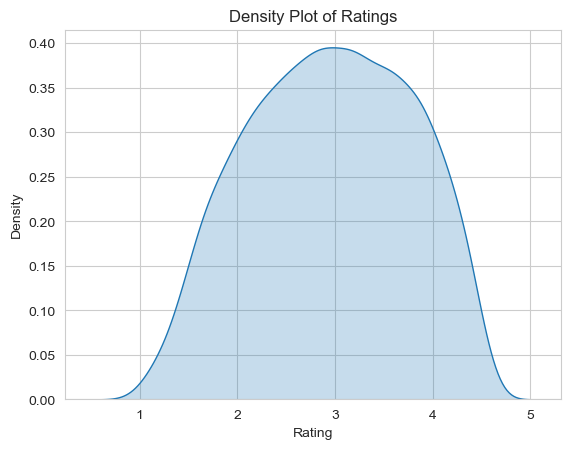

In [25]:
# Density Plots
sns.kdeplot(df['rating'], shade=True)
plt.title('Density Plot of Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.show()

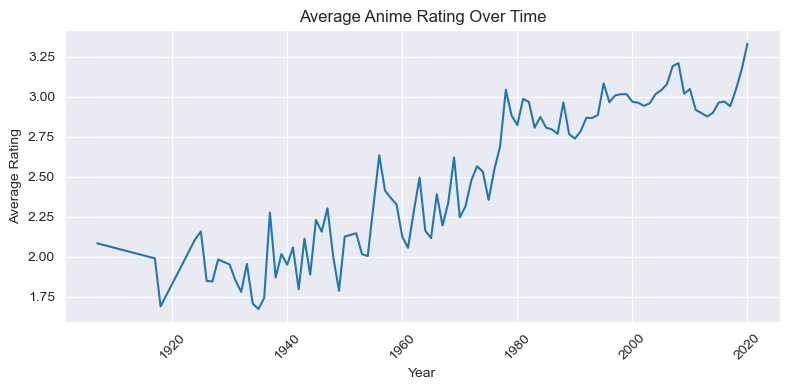

In [28]:
# Set the style for seaborn plots
sns.set_style('darkgrid')

# Group the data by year and get the average rating per year
ratings_over_time = df.groupby('startYr')['rating'].mean().reset_index()

# Plotting the time series for average rating
plt.figure(figsize=(8, 4))
sns.lineplot(data=ratings_over_time, x='startYr', y='rating')
plt.title('Average Anime Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()